In [1]:
import autograd as ag
from nn import MLP
import matplotlib.pyplot as plt
import numpy as np

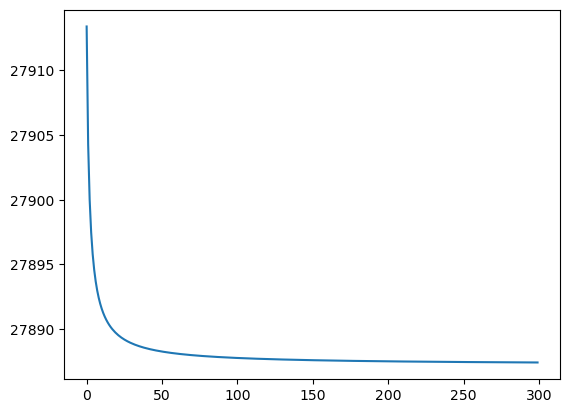

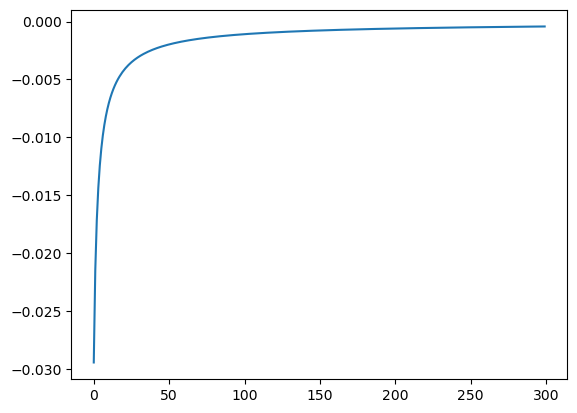

In [2]:
# lin-reg
xs = [[1],[2],[3],[4]]
y = [1, 4, 9, 16]

xs = np.array(np.arange(0, 20))
y = [x**2 for x in xs]

xs = xs.reshape(-1, 1)
clf = MLP(dims=[(1, 4), (4, 4), (4, 4), (4, 1)])

nit = 300
eta = 0.001
y_hat = None
losses = []
grad = []
for i in range(nit):
    y_hat = [clf.forward(x) for x in xs]
    loss = sum((y_h - y_t) ** 2 for y_h, y_t in zip(y_hat, y))/len(xs)
    clf.zero_grad()
    loss.backward()
    losses.append(loss.data)

    for i, p in enumerate(clf.params()):
        if i == 0:
            grad.append(p.grad)
        p.data -= eta * p.grad
        


plt.plot(np.arange(0, nit), losses)
plt.show()
plt.plot(np.arange(0, len(grad)), grad)
plt.show()

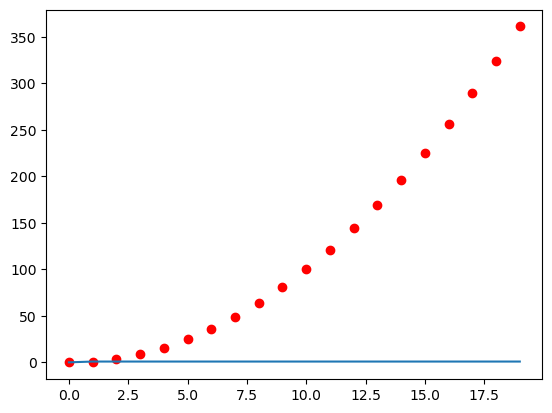

In [3]:
plt.scatter(xs, y, c='r')
plt.plot(xs, [y_h.data for y_h in y_hat])

(Value(label=, data=0.14496374390108865, grad=0.014097346628968768),)
Value(label=tanh, data=0.14395676130449764, grad=0.014395676130449765)


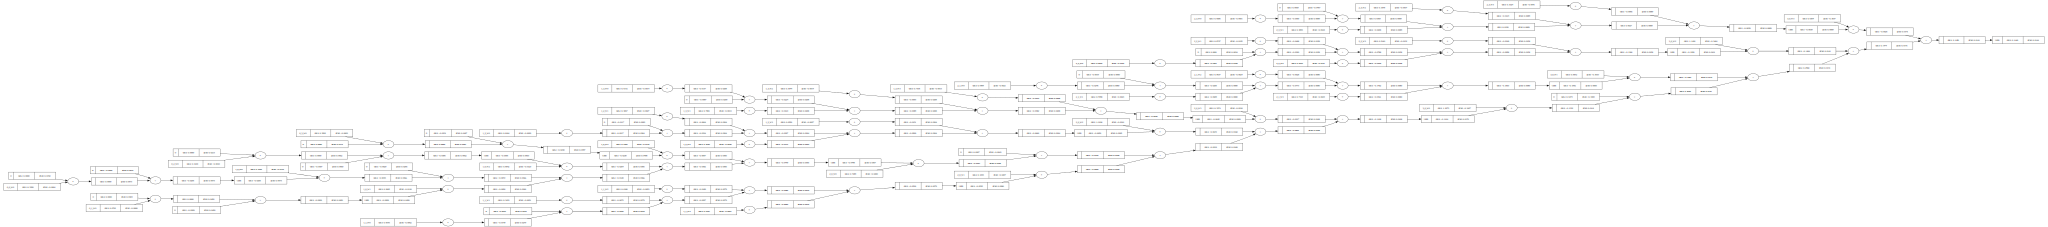

In [4]:
print(y_hat[0].children)
print(y_hat[0])
y_hat[0].draw_graph()

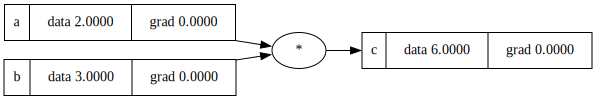

In [5]:
a = ag.Value(2.0, label='a')
b = ag.Value(3.0, label='b')
c = a * b; c.label = 'c'
c.draw_graph()

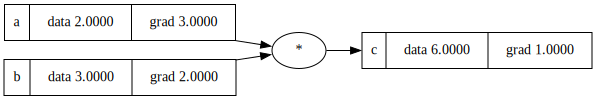

In [6]:
c.backward()
c.draw_graph()

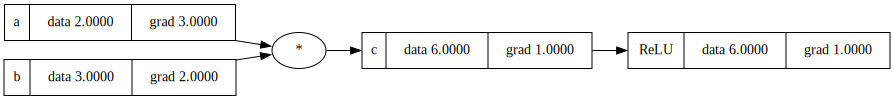

In [7]:
c.zero_grad()
t = c.relu()
t.backward()
t.draw_graph()